In [1]:
# from https://cospar.readthedocs.io/en/latest/20210121_all_hematopoietic_data_v3.html
import cospar as cs
import numpy as np

In [2]:
cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "LARRY_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "LARRY_figure"  # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=75, fontsize=14, pointsize=2
)

Running cospar 0.4.1 (python 3.9.20) on 2024-10-06 14:34.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [3]:
adata_orig = cs.datasets.hematopoiesis()

creating directory LARRY_figure for saving figures
try downloading from url
https://wangshouwen.lab.westlake.edu.cn/app/filebrowser/api/public/dl/rLFbKIvS/LARRY_adata_preprocessed.h5ad
... this may take a while but only happens once
creating directory LARRY_data for saving data


100%|██████████| 178M/178M [02:21<00:00, 1.32MB/s] 


In [4]:
adata_orig

AnnData object with n_obs × n_vars = 49116 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

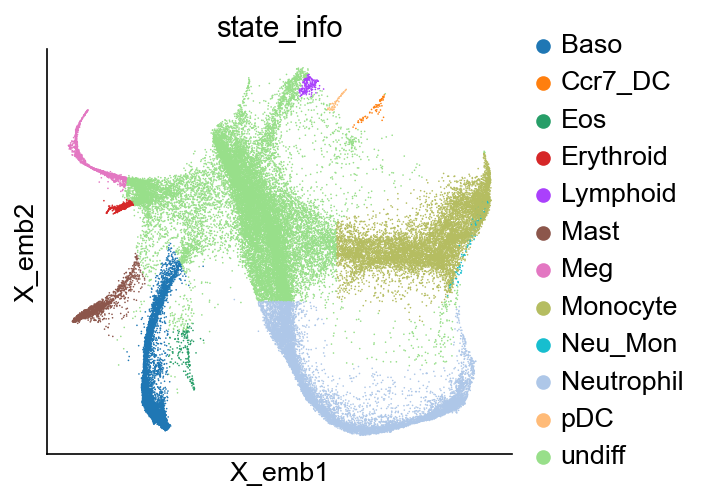

In [5]:
cs.pl.embedding(adata_orig, color="state_info")

In [6]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Available clusters: ['Baso', 'Neutrophil', 'Eos', 'Mast', 'Erythroid', 'Lymphoid', 'undiff', 'Neu_Mon', 'Meg', 'Monocyte', 'Ccr7_DC', 'pDC']
Available time points: ['2' '4' '6']
Clonal time points: ['2' '4' '6']


<Axes: title={'center': 'ID: 1'}>

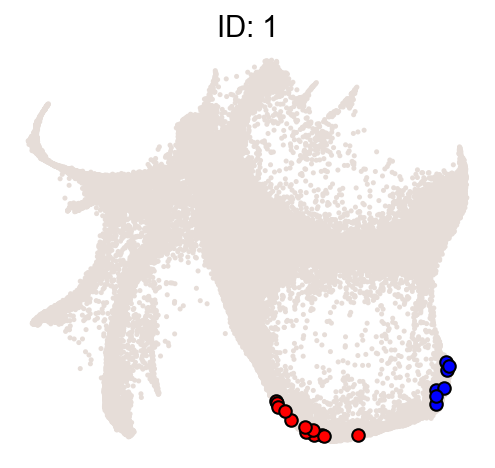

In [7]:
cs.pl.clones_on_manifold(
    adata_orig, selected_clone_list=[1], color_list=["black", "red", "blue"]
)

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<Axes: title={'center': 'source: X_clone'}>

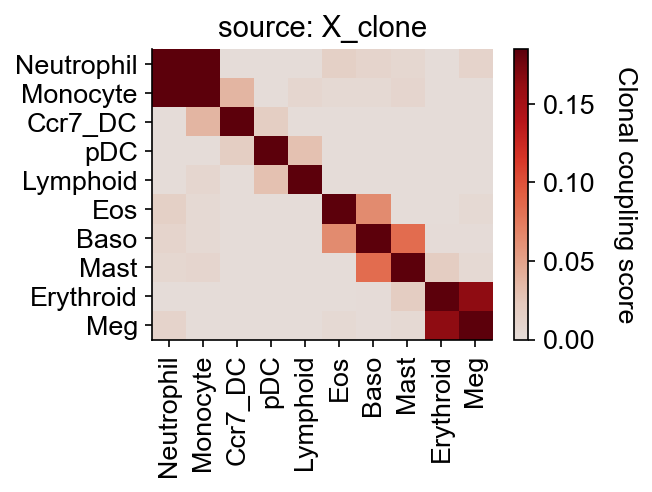

In [8]:
selected_times = "4"
selected_fates = [
    "Ccr7_DC",
    "Mast",
    "Meg",
    "pDC",
    "Eos",
    "Lymphoid",
    "Erythroid",
    "Baso",
    "Neutrophil",
    "Monocyte",
]
cs.tl.fate_coupling(
    adata_orig,
    source="X_clone",
    selected_fates=selected_fates,
    selected_times=selected_times,
    normalize=False,
)
cs.pl.fate_coupling(adata_orig, source="X_clone")

Data saved at adata.uns['barcode_heatmap']


<Axes: title={'center': '1927 clones'}>

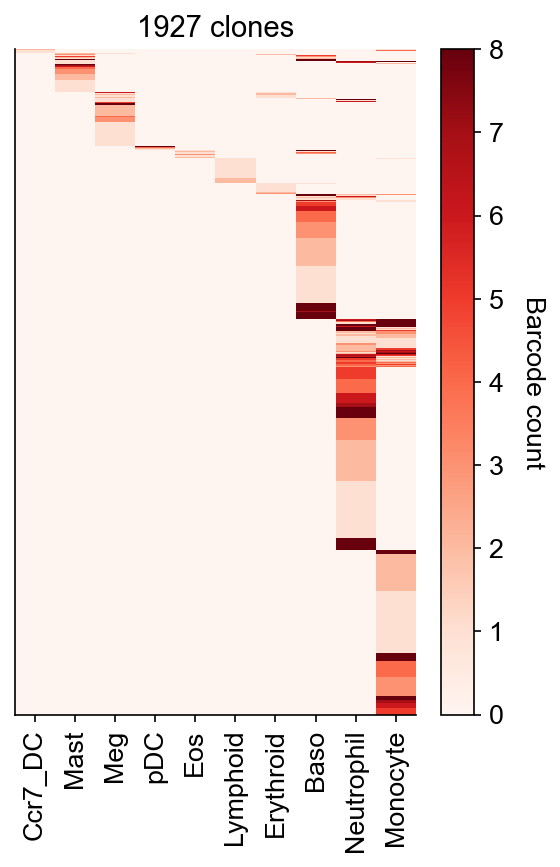

In [9]:
cs.pl.barcode_heatmap(
    adata_orig,
    selected_times=selected_times,
    selected_fates=selected_fates,
    color_bar=True,
)

Infer transition map from all clonal data

In [ ]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_orig,
    clonal_time_points=["2", "4", "6"],
    later_time_point="6",
    smooth_array=[20, 15, 10],
    sparsity_threshold=0.2,
    max_iter_N=3,
)

In [ ]:
save_data = False
if save_data:
    cs.hf.save_map(adata)

In [ ]:
selected_state_id_list = [2]

cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=False,
)

In [ ]:
selected_state_id_list = [4]
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=True,
)

In [ ]:
cs.tl.fate_map(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
)
cs.pl.fate_map(
    adata,
    selected_fates=["Neutrophil"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

In [ ]:
cs.tl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    pseudo_count=0,
    sum_fate_prob_thresh=0.1,
)
cs.pl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    plot_target_state=False,
    selected_times=["4"],
)

In [ ]:
selected_fates = [
    "Ccr7_DC",
    "Mast",
    "Meg",
    "pDC",
    "Eos",
    "Lymphoid",
    "Erythroid",
    "Baso",
    "Neutrophil",
    "Monocyte",
]
cs.tl.fate_coupling(adata, selected_fates=selected_fates, source="transition_map")
cs.pl.fate_coupling(adata, source="transition_map")

In [ ]:
cs.tl.fate_hierarchy(adata, selected_fates=selected_fates, source="transition_map")
cs.pl.fate_hierarchy(adata, source="transition_map")

In [ ]:
cs.tl.progenitor(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
    bias_threshold_A=0.5,
    bias_threshold_B=0.5,
    sum_fate_prob_thresh=0.2,
    avoid_target_states=True,
)
cs.pl.progenitor(
    adata, selected_fates=["Neutrophil", "Monocyte"], source="transition_map"
)

In [ ]:
gene_name_list = ["Gata1", "Mpo", "Elane", "S100a8"]
selected_fate = "Neutrophil"
cs.pl.gene_expression_dynamics(
    adata, selected_fate, gene_name_list, traj_threshold=0.2, invert_PseudoTime=False
)